# Práctica Sistemas Lineales

### Importo Librerias

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import imageio
import math
import copy
import numpy.linalg as linalg
from scipy.signal import convolve2d

### Importo imagenes

In [115]:
imgLena = imageio.imread('img/lena.png')
#imgTest = imageio.imread('img/test.png')
imgHouse = imageio.imread('img/house.png')


def mostrarImagen(img):
    plt.imshow(img, cmap='gray')
    plt.show()

def calcNivelesGrises(img):
    return np.iinfo(img.dtype).max+1

# Ejercicio 1

In [44]:
def umbral(img, threshold=None):
    if threshold == None:
        threshold = 100
    imgCopy = copy.deepcopy(img)
    for x in range(len(img)):
        for y in range(len(img[0])):
            if(img[x][y] > threshold):
                imgCopy[x][y] = 255
            else: 
                imgCopy[x][y] = 0
    return imgCopy

def compresionRangoDinamicoFloatsGrises(img, scale=255):
    maxV = calcNivelesGrises(img)-1
    c = scale/math.log(maxV+1)
    f = lambda v : c * math.log(v+1)

    imgCopy = np.zeros((len(img),len(img[0])))
    for x in range(len(img)):
        for y in range(len(img[0])):
            imgCopy[x][y] = f(imgCopy[x][y])
    return imgCopy

In [57]:
def obtenerMagnitud(imgX, imgY):
    sol = np.zeros((len(imgX),len(imgX[0])))
    for i in range(len(imgX)):
        for j in range(len(imgX[0])):
            sol[i][j] = math.sqrt(imgX[i][j]**2+imgY[i][j]**2)
    return sol

### a) Roberts

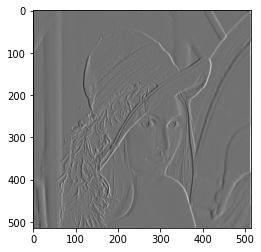

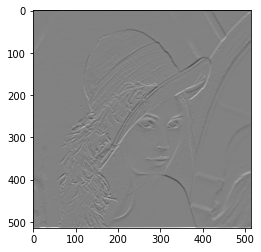

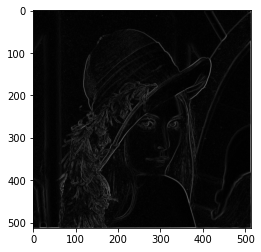

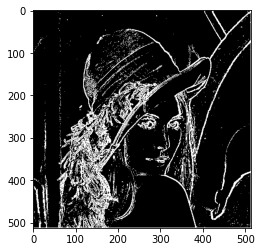

In [93]:
robertsX = np.array([[1,0],[0,-1]])
robertsY = np.array([[0,1],[-1,0]])

imgRobertsX = convolve2d(imgLena, robertsX)
imgRobertsY = convolve2d(imgLena, robertsY)
imgFinal = obtenerMagnitud(imgRobertsX,imgRobertsY)

mostrarImagen(dx)
mostrarImagen(dy)
mostrarImagen(imgFinal)
mostrarImagen(umbral(imgFinal,20))

### b) Prewitt

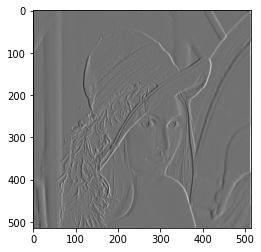

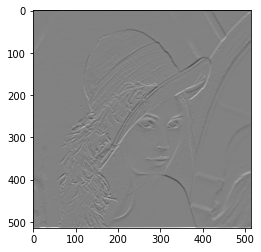

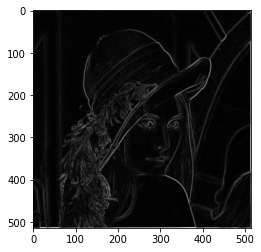

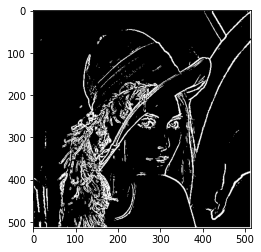

In [92]:
prewittX = np.array([[-1, 0, 1],
              [-1, 0, 1],
              [-1, 0, 1]])
prewittY = a.T

dx = convolve2d(imgLena, prewittX)
dy = convolve2d(imgLena, prewittY)
imgFinal = obtenerMagnitud(dx,dy)

mostrarImagen(dx)
mostrarImagen(dy)
mostrarImagen(imgFinal)
mostrarImagen(umbral(imgFinal,100))

### b) Sobel

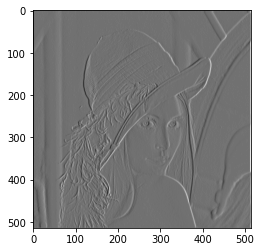

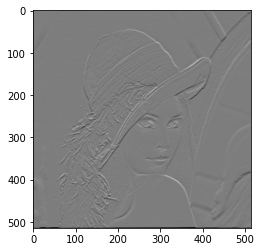

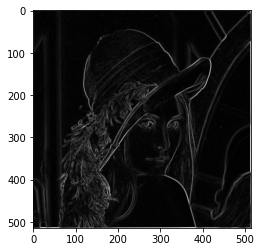

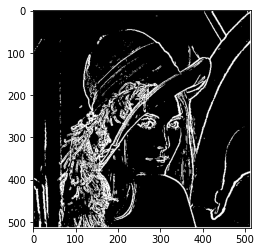

In [91]:
sobelX = np.array([[-1, 0, 1],
              [-2, 0, 2],
              [-1, 0, 1]])
sobelY = np.array([[1, 2, 1],
              [0, 0, 0],
              [-1, -2, -1]])

dx = convolve2d(imgLena, sobelX)
dy = convolve2d(imgLena, sobelY)

imgFinal = obtenerMagnitud(dx,dy)

mostrarImagen(dx)
mostrarImagen(dy)
mostrarImagen(imgFinal)
mostrarImagen(umbral(imgFinal,100))

# Ejercicio 2

### Ruido Gaussiano

In [198]:
def aplicarRuidoGaussiano(img, a=5, b=5):
    imgCopy = copy.deepcopy(img)
    for i in range(len(img)):
        for j in range(len(img[0])):
            imgCopy[i][j] += int(a + (b-a)*np.random.normal(0,1))
    return imgCopy


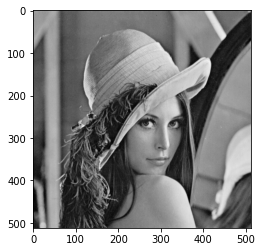

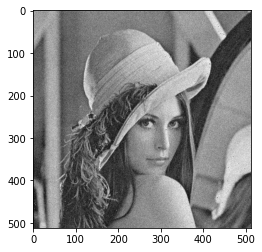

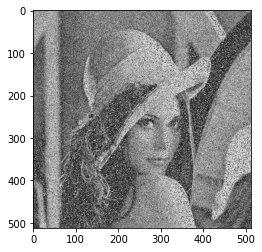

In [199]:
mostrarImagen(imgLena)
mostrarImagen(aplicarRuidoGaussiano(imgLena, 0,15))
mostrarImagen(aplicarRuidoGaussiano(imgLena, 0,40))

### Ruido Rayleigh

In [195]:
def aplicarRuidoRayleigh(img, eps=1, a=1, b=1):
    imgCopy = copy.deepcopy(img)
    for i in range(len(img)):
        for j in range(len(img[0])):
            imgCopy[i][j] = img[i][j]*eps*int(a + math.sqrt(-b*math.log(1-np.random.rand(1)[0] ) ) )
    return imgCopy

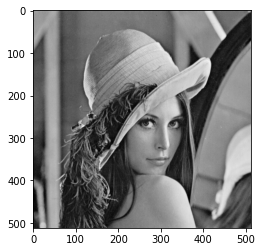

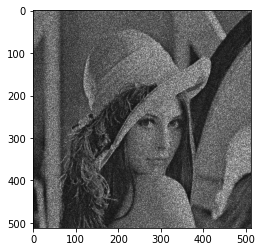

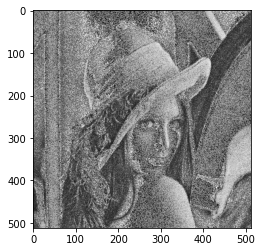

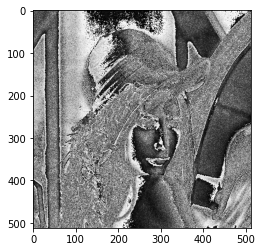

In [197]:
mostrarImagen(imgLena)
mostrarImagen(aplicarRuidoRayleigh(imgLena, 0.5))
mostrarImagen(aplicarRuidoRayleigh(imgLena))
mostrarImagen(aplicarRuidoRayleigh(imgLena, 2))

### Método del Laplaciano

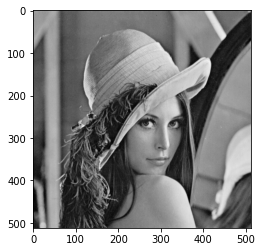

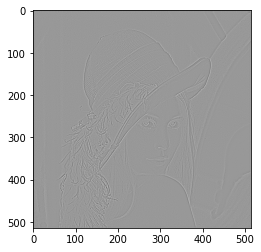

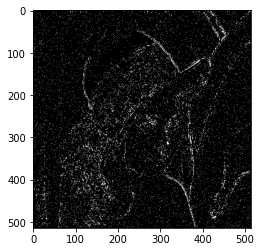

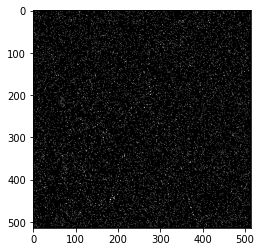

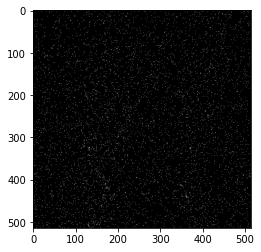

In [202]:
def zeroCrossing(img):
    imgCopy = np.zeros((len(img),len(img[0])))
    for i in range(1,len(img)-1):
        for j in range(1,len(img[0])-1):
            if img[i][j]*img[i-1][j] < 0 or img[i][j]*img[i+1][j] < 0 or img[i][j]*img[i][j-1] < 0 or img[i][j]*img[i+1][j+1] < 0 or img[i][j] == 0:
                imgCopy[i][j] = 0
            else:
                imgCopy[i][j] = 255
    return imgCopy
mascara = np.array([[0,1,0],
                    [1,-4,1],
                    [0,1,0]])
mostrarImagen(imgLena)
mostrarImagen(convolve2d(imgLena, mascara))
mostrarImagen(zeroCrossing(convolve2d(imgLena, mascara)))
mostrarImagen(zeroCrossing(convolve2d(aplicarRuidoRayleigh(imgLena, 0.5), mascara)))
mostrarImagen(zeroCrossing(convolve2d(aplicarRuidoGaussiano(imgLena, 0,20), mascara)))


### Método del Laplaciano con evaluación local de varianza

# Ejercicio 3

# Ejercicio 4